In [2]:
from __future__ import division, print_function
import numpy as np
import codecs
import re
import json
import random
from collections import defaultdict, Counter
import math

%load_ext autoreload
%autoreload 2
%matplotlib inline

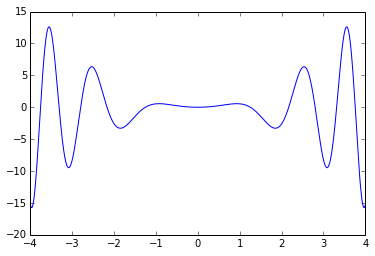

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-4, 4, 1000)
plt.plot(X, X**2*np.cos(X**2))
plt.savefig("simple.pdf")


In [4]:
def square(n):
    return n**2


In [5]:
sum(square(np.array(range(999)).astype(float)/1000)/1000)

0.33183549900000026

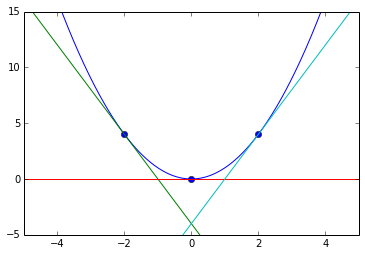

In [6]:
a = np.arange(-5,5,0.01)
f_x = np.power(a,2)
plt.plot(a,f_x)
plt.xlim(-5,5)
plt.ylim(-5,15)
k= np.array([-2,0,2])
plt.plot(k,k**2,"bo")
for i in k:
    plt.plot(a, (2*i)*a - (i**2))


In [9]:
from lxmls.readers import galton
galton_data = galton.load()
galton_data.shape
galton_data[:10]


array([[ 70.5,  61.7],
       [ 68.5,  61.7],
       [ 65.5,  61.7],
       [ 64.5,  61.7],
       [ 64. ,  61.7],
       [ 67.5,  62.2],
       [ 67.5,  62.2],
       [ 67.5,  62.2],
       [ 66.5,  62.2],
       [ 66.5,  62.2]])

* Matrix multiplication is associative: ( AB)C = A( BC ).
* Matrix multiplication is distributive: A( B + C ) = AB + AC.
* Matrix multiplication is (generally) not commutative : AB = BA.

numpy.random.randn



In [10]:
print(np.average(galton_data, axis=0))
print(np.std(galton_data, axis=0))

[ 68.30818966  68.08846983]
[ 1.78637014  2.51658435]


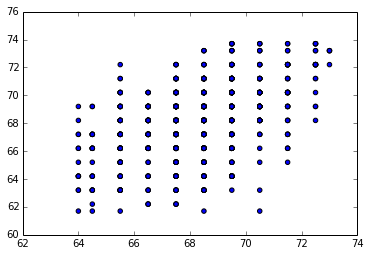

In [12]:
plt.scatter(galton_data[:,0], galton_data[:,1])
plt.show()

In [13]:
np.random.random()

0.5994259890403192

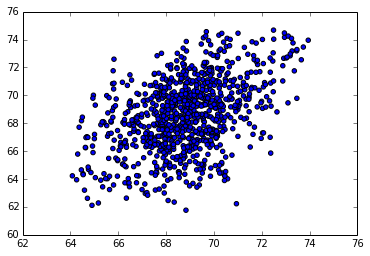

In [17]:
noisey_galton = galton_data + np.random.random(galton_data.shape)

plt.scatter(noisey_galton[:,0], noisey_galton[:,1])
plt.show()

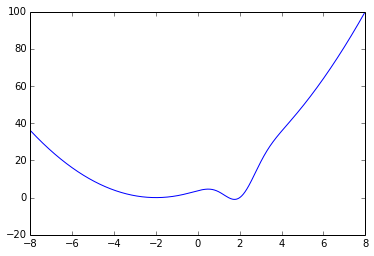

In [32]:
def get_y(x):
    return (x+2)**2 - 16*np.exp(-((x-2)**2))

x = np.arange(-8,8,0.001)
y = map(lambda u: get_y(u),x)
plt.plot(x,y)
plt.show()


In [40]:
np.ravel(galton_data)

array([ 70.5,  61.7,  68.5, ...,  73.7,  69.5,  73.7])

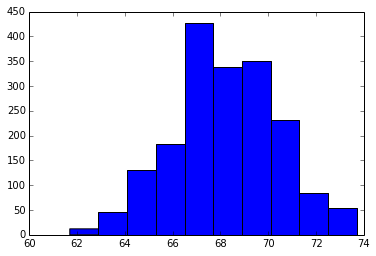

In [41]:
plt.hist(np.ravel(galton_data))
plt.show()

#### Least squares update rule

$\theta_j := \theta_j + \alpha \sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)}))x_{j}^{(i)} $ 

In [110]:
def error(theta, X, y):
#     assert theta.shape[0] == X.shape[1] 
#     assert x.shape[0] == y.shape 
    return np.sum([(theta.dot(x) - y) ** 2 for x in X]) / X.shape[0]

In [115]:
# compute gradient of every parameter with respect to X
# this is BATCH
def lr_gradient(theta, X, y):
    y_h = []
    for row in X:
        y_h.append(theta.dot(row))
    y_hat = np.array(y_h).reshape(len(y_h), 1)
    assert y.shape == y_hat.shape
    y_diff = np.sum(y - y_hat)
    return ((theta * y_diff) / X.shape[0])

In [116]:
# return new theta
def update(alpha, grads, theta):
    assert theta.shape == grads.shape
    return theta + (alpha* grads)

In [117]:
def linear_regression(X, y, alpha, iters):
    theta = np.random.random(X.shape[1])
    
    for i in range(iters):
        grads = lr_gradient(theta, X, y)
        theta = update(alpha, grads, theta)
        if i % 10 == 0:
            print('iter: {} -- current error: {}'.format(i, error(theta, X, y)))
    
    return theta

In [120]:
X = np.atleast_1d(np.hstack([galton_data[:, 0].reshape(galton_data.shape[0], 1), 
                             np.ones((galton_data.shape[0], 1), dtype=float)]))

y = np.atleast_2d(galton_data[:, 1]).transpose()

alpha = .01
iters = 100

best_theta = linear_regression(X,y,alpha,iters)

x_max = 60
y_max = 80

theta_ys = [np.array([x, 1.0], dtype=float).dot(best_theta) for x in range(x_max,y_max)]
print(best_theta)


iter: 0 -- current error: 2600323.32173
iter: 10 -- current error: 8511.22513732
iter: 20 -- current error: 8512.53674577
iter: 30 -- current error: 8512.53676585
iter: 40 -- current error: 8512.53676585
iter: 50 -- current error: 8512.53676585
iter: 60 -- current error: 8512.53676585
iter: 70 -- current error: 8512.53676585
iter: 80 -- current error: 8512.53676585
iter: 90 -- current error: 8512.53676585
[ 0.94334831  3.65005455]


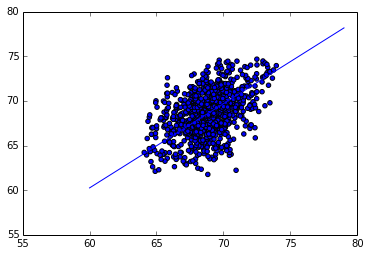

In [121]:
plt.scatter(noisey_galton[:,0], noisey_galton[:,1])
plt.plot(range(x_max,y_max), theta_ys)
plt.show()